In [12]:
import pandas as pd
data = pd.read_csv("S:/Science_and_Research/ERA5_Reanalysis_1990-2020/SGF/1990 (done)/Springfield_1990_January_Clouds.csv")

In [13]:

cloud_sum = []

In [14]:
for i in range(round(len(data)/12)):
    cloud_sum.append(sum(data["tcc"][i*12:12 + i*12])/12)

In [15]:
sum(data["tcc"][0:12])/12

0.06476635106666666

In [16]:
asos = pd.read_csv("S:/Science_and_Research/ASOS Data/SGF_ASOS_done.csv")
asos = asos[((pd.to_datetime(asos["valid"]).dt.minute > 30) & (pd.to_datetime(asos["valid"]).dt.hour >= 11)) | ((asos["newtimes"] == 0) & (pd.to_datetime(asos["valid"]).dt.minute < 30)) | ((pd.to_datetime(asos["valid"]).dt.minute == 0) & (pd.to_datetime(asos["valid"]).dt.hour > 11))].reset_index(drop=True)
asos_sum = []
running_total = 0

In [17]:
count = 0
asos[:10]

,Unnamed: 0,station,valid,skyc1,skyc2,skyc3,newtimes
0,0,SGF,1/1/1990 0:00,SCT,M,M,0
1,12,SGF,1/1/1990 12:00,CLR,,,12
2,13,SGF,1/1/1990 13:00,CLR,,,13
3,14,SGF,1/1/1990 14:00,CLR,,,14
4,15,SGF,1/1/1990 15:00,CLR,,,15
5,16,SGF,1/1/1990 16:00,CLR,,,16
6,17,SGF,1/1/1990 17:00,CLR,,,17
7,18,SGF,1/1/1990 18:00,CLR,,,18
8,19,SGF,1/1/1990 19:00,CLR,,,19
9,20,SGF,1/1/1990 20:00,CLR,,,20


In [18]:
dates_list = []

In [19]:
for i in range(len(asos)):
    count +=1
    if asos["skyc1"][i] == "CLR":
        running_total += 0
    elif asos["skyc1"][i] == "FEW":
        if asos["skyc2"][i] == "OVC" or asos["skyc3"][i] == "OVC":
            running_total += 1
        elif asos["skyc2"][i] == "BKN" or asos["skyc3"][i] == "BKN":
            running_total +=6/8
        elif asos["skyc2"][i] == "SCT" or asos["skyc3"][i] == "SCT":
            running_total += 3/8
        else:
            running_total += 1/8
    elif asos["skyc1"][i] == "SCT":
        if asos["skyc2"][i] == "OVC" or asos["skyc3"][i] == "OVC":
            running_total += 1
        elif asos["skyc2"][i] == "BKN" or asos["skyc3"][i] == "BKN":
            running_total += 6/8
        else:
            running_total +=3/8
    elif asos["skyc1"][i] == "BKN":
        if asos["skyc2"][i] == "OVC" or asos["skyc3"][i] == "OVC":
            running_total +=1
        else:
            running_total += 6/8
    elif asos["skyc1"][i] == "OVC":
        running_total += 1
    if i > 0:
        if ((pd.to_datetime(asos["valid"][i]).day != pd.to_datetime(asos["valid"][i-1]).day) & (pd.to_datetime(asos["valid"][i]).minute == 0) | ((asos["newtimes"][i] == 23) & (pd.to_datetime(asos["valid"][i]).minute >= 30)) ) :
            asos_sum.append(running_total/count)
            running_total = 0
            count = 0
            if asos["newtimes"][i] == 23:
                dates_list.append(pd.to_datetime(asos["valid"][i]))
            else:
                dates_list.append(pd.to_datetime(asos["valid"][i-1]))
                
                                  
                
        

In [20]:
dates_list[10540:10555]

[Timestamp('2020-01-01 23:52:00'),
 Timestamp('2020-01-02 23:52:00'),
 Timestamp('2020-01-03 23:52:00'),
 Timestamp('2020-01-04 23:52:00'),
 Timestamp('2020-01-05 23:52:00'),
 Timestamp('2020-01-06 23:52:00'),
 Timestamp('2020-01-07 23:52:00'),
 Timestamp('2020-01-08 23:52:00'),
 Timestamp('2020-01-09 23:52:00'),
 Timestamp('2020-01-10 23:52:00'),
 Timestamp('2020-01-11 23:52:00'),
 Timestamp('2020-01-12 23:52:00'),
 Timestamp('2020-01-13 23:52:00'),
 Timestamp('2020-01-14 23:52:00'),
 Timestamp('2020-01-15 23:52:00')]

In [21]:
import matplotlib.pyplot as plt
xaxis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

[0.7788461538461539,
 0.7788461538461539,
 0.49038461538461536,
 0.057692307692307696,
 0.11538461538461539]

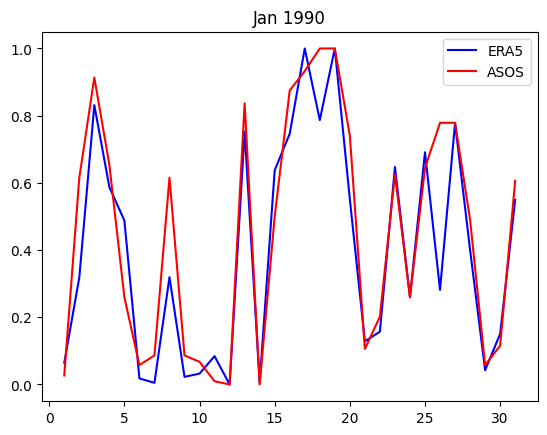

In [27]:
plt.plot(xaxis,cloud_sum[0:31],color = "blue")
plt.plot(xaxis, asos_sum[0:31], color = "red")
plt.legend(["ERA5","ASOS"])
plt.title("Jan 1990")
asos_sum[25:30]

In [69]:
len(asos)

142092

In [56]:
marchdata = pd.read_csv("S:/Science_and_Research/ERA5_Reanalysis_1990-2020/SGF/1990 (done)/Springfield_1990_March_Clouds.csv")
mar_sum = []
for i in range(round(len(marchdata)/12)):
    mar_sum.append(sum(marchdata["tcc"][i*12:12 + i*12])/12)

In [134]:
mar_sum

[0.1275451585,
 0.29360525695833334,
 0.0044837469166666664,
 0.047131471,
 0.8028270683333334,
 0.9672823949999999,
 0.9861392958333334,
 0.43235597016666666,
 0.7541111591666666,
 0.8404379033333332,
 0.999907175,
 0.6106478280833333,
 0.9614316574999999,
 0.9822570275000001,
 0.602700165,
 0.15573450926666668,
 0.11953138263333334,
 0.9552451983333333,
 0.14941454458333334,
 0.13039740799083333,
 0.9556686391666668,
 0.093090509825,
 0.8405116475000001,
 1.0,
 0.8529201733333333,
 0.32028393,
 0.9068955166666667,
 1.0,
 0.99220367,
 1.0,
 0.9206786416666667]

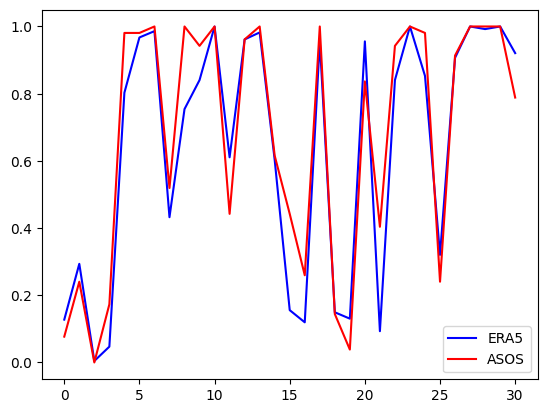

In [67]:
plt.plot(mar_sum[0:31], color = "blue")
plt.plot(asos_sum[59:90], color = "red")
plt.legend(["ERA5","ASOS"])
plt.title("Mar 1990")

In [58]:
augdata = pd.read_csv("S:/Science_and_Research/ERA5_Reanalysis_1990-2020/SGF/1990 (done)/Springfield_1990_August_Clouds.csv")
aug_sum = []
for i in range(round(len(augdata)/12)):
    aug_sum.append(sum(augdata["tcc"][i*12:12 + i*12])/12)

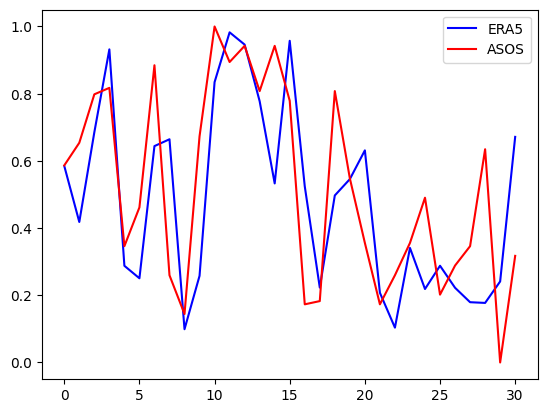

In [68]:
plt.plot(aug_sum[0:31], color = "blue")
plt.plot(asos_sum[212:243], color = "red")
plt.legend(["ERA5","ASOS"])
plt.title("Aug 1990")

In [2]:
jandata2020 = pd.read_csv("S:/Science_and_Research/ERA5_Reanalysis_1990-2020/SGF/2020 (done)/Springfield_2020_January_Clouds.csv")
mardata2020 = pd.read_csv("S:/Science_and_Research/ERA5_Reanalysis_1990-2020/SGF/2020 (done)/Springfield_2020_March_Clouds.csv")
augdata2020 = pd.read_csv("S:/Science_and_Research/ERA5_Reanalysis_1990-2020/SGF/2020 (done)/Springfield_2020_August_Clouds.csv")

In [72]:
jan2020_sum = []
for i in range(round(len(jandata2020[1:])/13)):
    jan2020_sum.append(sum(jandata2020["tcc"][i*13+1:13 + i*13+1])/13)

Text(0.5, 1.0, 'Jan 2020')

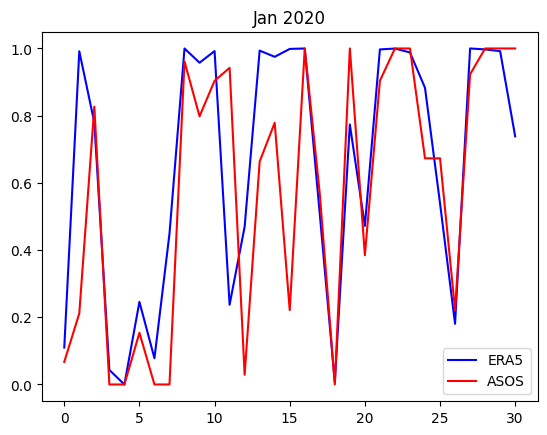

In [119]:
plt.plot(jan2020_sum, color = "blue")
plt.plot(asos_sum[10540:10571], color = "red")
plt.legend(["ERA5","ASOS"])
plt.title("Jan 2020")

In [74]:
mar2020_sum = []
for i in range(round(len(mardata2020[1:])/13)):
    mar2020_sum.append(sum(mardata2020["tcc"][i*13+1:13 + i*13+1])/13)

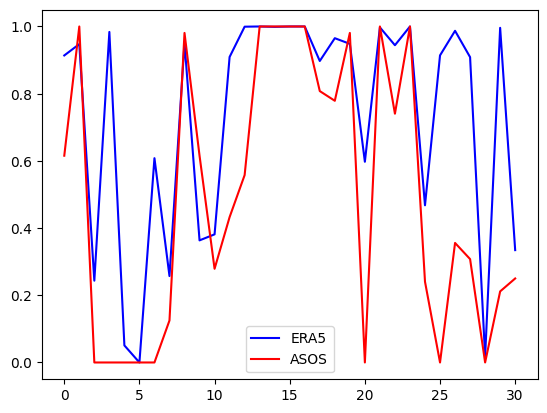

In [116]:
plt.plot(mar2020_sum, color = "blue")
plt.plot(asos_sum[10599:10630], color = "red")
plt.legend(["ERA5","ASOS"])
plt.title("Mar 2020")

In [3]:
aug2020_sum = []
for i in range(round(len(augdata2020[1:])/13)):
    aug2020_sum.append(sum(augdata2020["tcc"][i*13+1:13 + i*13+1])/13)

In [4]:
aug2020_sum

[0.7400158915384616,
 0.4076865576923077,
 0.4734678646153846,
 0.7127823946153846,
 0.46138587294615385,
 0.5853856380769231,
 0.40673107846153844,
 0.5245601507692308,
 0.6239217069230769,
 0.3254038757846154,
 0.9471763515384615,
 0.1848100016923077,
 0.6648617461538462,
 0.2776651622307692,
 0.7229358323076924,
 0.37806906515384614,
 0.5231457036153846,
 0.5895796447692307,
 0.2882071164192308,
 0.0026762783846153845,
 0.17313298046153847,
 0.11001386376923078,
 0.07109864795384616,
 0.17365296833076924,
 0.33113675076923077,
 0.8315469942307693,
 0.9823119053846153,
 0.42101747423076924,
 0.8597218807692308,
 0.915968353076923,
 0.7967448015384615]

Text(0.5, 1.0, 'Aug 2020')

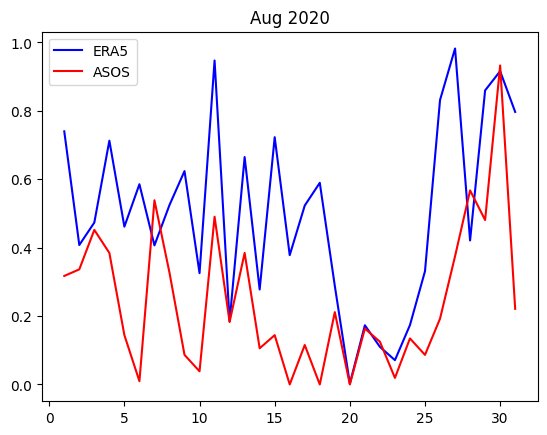

In [24]:
plt.plot(xaxis, aug2020_sum, color = "blue")
plt.plot(xaxis, asos_sum[10751:10782], color = "red")
plt.legend(["ERA5","ASOS"])
plt.title("Aug 2020")